ETL PIPELINE

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib


In [63]:
df = pd.read_csv('Process_data\diabetes_clean.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_12844\404392616.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('Process_data\diabetes_clean.csv')


,age,gender,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,...,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal
0,0.504956,1,-1.413253,1.138363,5.7,0.824199,0.771162,0,0,0,...,False,False,False,True,True,False,False,True,False,False
1,-0.135884,0,-0.707921,0.285376,6.7,-0.454787,1.095260,0,0,0,...,False,False,True,False,False,False,False,False,False,False
2,0.633124,1,-0.707921,-0.733470,6.4,2.742678,0.852187,1,0,0,...,False,True,False,True,False,False,False,False,False,True
3,1.530299,0,-1.413253,-0.828246,3.4,-0.363431,-0.322667,0,0,0,...,False,False,False,True,False,True,False,False,True,False
4,-0.264052,1,-0.707921,-0.117424,7.2,0.367418,-0.403691,0,0,0,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.264052,1,-0.707921,0.202447,8.3,-0.546144,-0.606252,0,0,0,...,False,True,True,False,False,True,False,False,False,False
99996,-0.584472,0,0.702744,-0.508376,8.8,-0.180719,-0.484715,0,0,0,...,False,False,False,True,False,True,False,True,False,False
99997,0.440872,0,1.408076,0.024741,9.9,-1.825130,0.041943,0,0,1,...,False,False,True,False,False,True,False,True,False,False
99998,-0.199968,0,0.702744,-0.792705,5.9,-0.272075,-2.226739,0,1,0,...,False,False,False,True,False,True,False,False,False,True


In [64]:
import pandas as pd


# Check for missing values
print("Missing values per column:\n", df.isnull().sum().sum())

# Check duplicates
print("Number of duplicates:", df.duplicated().sum())

# Check dtypes
print(df.dtypes.value_counts())


Missing values per column:
 400
Number of duplicates: 0
bool       22
float64    16
int64      11
Name: count, dtype: int64


In [65]:
df

,age,gender,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,...,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal
0,0.504956,1,-1.413253,1.138363,5.7,0.824199,0.771162,0,0,0,...,False,False,False,True,True,False,False,True,False,False
1,-0.135884,0,-0.707921,0.285376,6.7,-0.454787,1.095260,0,0,0,...,False,False,True,False,False,False,False,False,False,False
2,0.633124,1,-0.707921,-0.733470,6.4,2.742678,0.852187,1,0,0,...,False,True,False,True,False,False,False,False,False,True
3,1.530299,0,-1.413253,-0.828246,3.4,-0.363431,-0.322667,0,0,0,...,False,False,False,True,False,True,False,False,True,False
4,-0.264052,1,-0.707921,-0.117424,7.2,0.367418,-0.403691,0,0,0,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.264052,1,-0.707921,0.202447,8.3,-0.546144,-0.606252,0,0,0,...,False,True,True,False,False,True,False,False,False,False
99996,-0.584472,0,0.702744,-0.508376,8.8,-0.180719,-0.484715,0,0,0,...,False,False,False,True,False,True,False,True,False,False
99997,0.440872,0,1.408076,0.024741,9.9,-1.825130,0.041943,0,0,1,...,False,False,True,False,False,True,False,True,False,False
99998,-0.199968,0,0.702744,-0.792705,5.9,-0.272075,-2.226739,0,1,0,...,False,False,False,True,False,True,False,False,False,True


In [66]:
import pandas as pd
import numpy as np



# Separate by type
num_cols = df.select_dtypes(include=['float64','int64']).columns
bool_cols = df.select_dtypes(include=['bool']).columns

# Fill numeric NaNs with median
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Fill boolean NaNs with 0
for col in bool_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(0).astype(int)

# Double check
print("Remaining missing values:", df.isnull().sum().sum())


Remaining missing values: 0


In [67]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns again (exclude target if present)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if "diagnosed_diabetes" in numeric_cols:
    numeric_cols.remove("diagnosed_diabetes")

# Scale
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("✅ All numeric features standardized after imputation.")


✅ All numeric features standardized after imputation.


In [68]:
# Summary of numeric features
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,100000.0,1.442402e-17,1.000005,-2.058404,-0.712640,-0.007716,0.697208,2.555643
gender,100000.0,-6.316725e-17,1.000005,-0.961951,-0.961951,-0.961951,0.895204,2.752359
alcohol_consumption_per_week,100000.0,2.398082e-17,1.000005,-1.413253,-0.707921,-0.002589,0.702744,5.640069
physical_activity_minutes_per_week,100000.0,-4.893863e-18,1.000005,-1.408751,-0.733470,-0.224047,0.486776,8.459836
diet_score,100000.0,2.020073e-16,1.000005,-3.366070,-0.670872,0.002927,0.676727,2.248925
sleep_hours_per_day,100000.0,1.120881e-17,1.000005,-3.652253,-0.637500,0.001993,0.641487,2.742678
screen_time_hours_per_day,100000.0,8.952838e-18,1.000005,-2.226739,-0.687276,0.001431,0.690138,4.376746
family_history_diabetes,100000.0,-5.801581e-17,1.000005,-0.530172,-0.530172,-0.530172,-0.530172,1.886181
hypertension_history,100000.0,-7.222667e-17,1.000005,-0.578582,-0.578582,-0.578582,1.728364,1.728364
cardiovascular_history,100000.0,-2.415845e-17,1.000005,-0.293278,-0.293278,-0.293278,-0.293278,3.409731


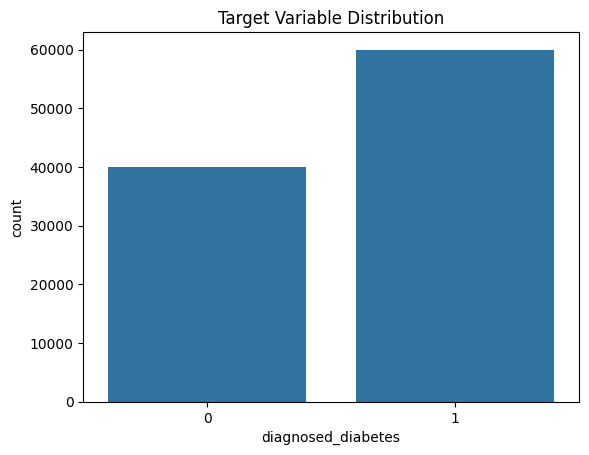

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Diagnosed diabetes distribution
sns.countplot(x="diagnosed_diabetes", data=df)
plt.title("Target Variable Distribution")
plt.show()


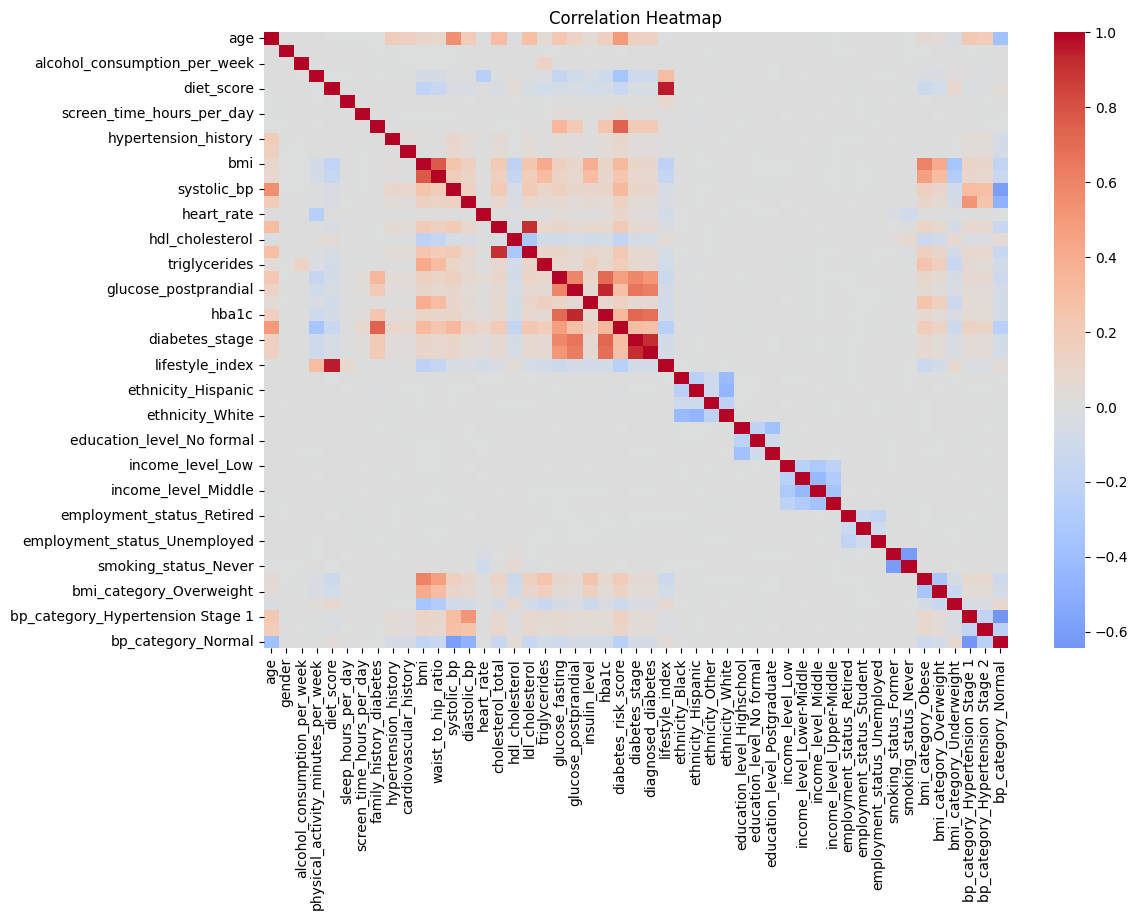

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


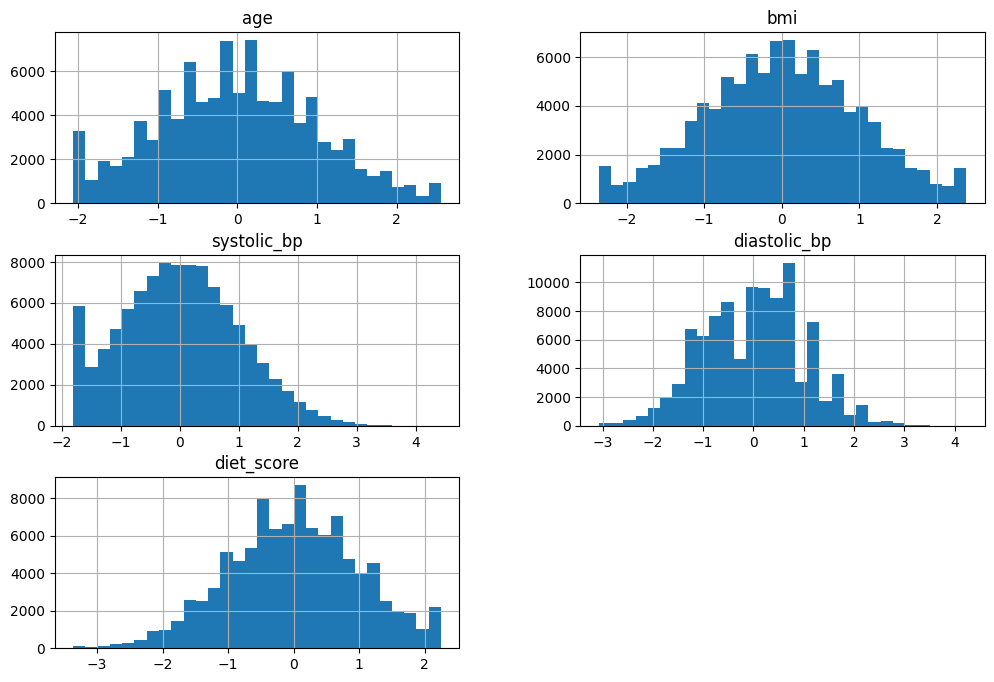

In [71]:
df[['age','bmi','systolic_bp','diastolic_bp','diet_score']].hist(bins=30, figsize=(12,8))
plt.show()


In [72]:
import pandas as pd
if 'df' not in globals():
    df = pd.read_csv('Process_data\diabetes_final_standardized.csv')

def restore_category(df, prefix, categories):
    df[prefix] = df[[f"{prefix}_{cat}" for cat in categories]].idxmax(axis=1).str.replace(f"{prefix}_", "")
    df.drop(columns=[f"{prefix}_{cat}" for cat in categories], inplace=True)
    return df

# Example usage:
categories_map = {
    "ethnicity": ["Black", "Hispanic", "Other", "White"],
    "education_level": ["Highschool", "No formal", "Postgraduate"],
    "income_level": ["Low", "Lower-Middle", "Middle", "Upper-Middle"],
    "employment_status": ["Retired", "Student", "Unemployed"],
    "smoking_status": ["Former", "Never"],
    "bmi_category": ["Obese", "Overweight", "Underweight"],
    "bp_category": ["Hypertension Stage 1", "Hypertension Stage 2", "Normal"]
}

for col, cats in categories_map.items():
    df = restore_category(df, col, cats)


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_12844\3215388137.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('Process_data\diabetes_final_standardized.csv')


In [73]:
df


,age,gender,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,...,diabetes_stage,diagnosed_diabetes,lifestyle_index,ethnicity,education_level,income_level,employment_status,smoking_status,bmi_category,bp_category
0,0.504956,0.895204,-1.413253,1.138363,-0.165523,0.824199,0.771162,-0.530172,-0.578582,-0.293278,...,0.747405,1,0.245046,Black,Highschool,Lower-Middle,Retired,Never,Obese,Hypertension Stage 1
1,-0.135884,-0.961951,-0.707921,0.285376,0.395977,-0.454787,1.095260,-0.530172,-0.578582,-0.293278,...,-2.379355,0,0.429401,White,Highschool,Middle,Retired,Former,Obese,Hypertension Stage 1
2,0.633124,0.895204,-0.707921,-0.733470,0.227527,2.742678,0.852187,1.886181,-0.578582,-0.293278,...,0.747405,1,0.196508,Hispanic,Highschool,Middle,Unemployed,Never,Obese,Normal
3,1.530299,-0.961951,-1.413253,-0.828246,-1.456972,-0.363431,-0.322667,-0.530172,-0.578582,-0.293278,...,0.747405,1,-1.662187,Black,Highschool,Low,Retired,Never,Overweight,Hypertension Stage 2
4,-0.264052,0.895204,-0.707921,-0.117424,0.676727,0.367418,-0.403691,-0.530172,-0.578582,-0.293278,...,0.747405,1,0.635576,White,Highschool,Middle,Retired,Never,Obese,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.264052,0.895204,-0.707921,0.202447,1.294376,-0.546144,-0.606252,-0.530172,-0.578582,-0.293278,...,-0.815975,0,1.252766,Other,Highschool,Upper-Middle,Unemployed,Former,Overweight,Hypertension Stage 1
99996,-0.584472,-0.961951,0.702744,-0.508376,1.575126,-0.180719,-0.484715,-0.530172,-0.578582,-0.293278,...,-0.815975,0,1.332921,White,Highschool,Middle,Retired,Never,Overweight,Hypertension Stage 1
99997,0.440872,-0.961951,1.408076,0.024741,2.192775,-1.825130,0.041943,-0.530172,-0.578582,3.409731,...,-2.379355,0,1.960798,Black,No formal,Upper-Middle,Retired,Former,Overweight,Hypertension Stage 1
99998,-0.199968,-0.961951,0.702744,-0.792705,-0.053223,-0.272075,-2.226739,-0.530172,1.728364,-0.293278,...,-0.815975,0,-0.308911,Black,Highschool,Lower-Middle,Retired,Never,Overweight,Normal


In [74]:
import os
import pandas as pd

# ---------- Config ----------
CLEANED_PATH = "/mnt/data/diabetes_cleaned_categorical_fixed.csv"
ORIG_PATH = "/mnt/data/diabetes_final_standardized.csv"
OUTPATH = "/mnt/data/diabetes_for_powerbi_simple.csv"

# ---------- Load ----------
path = CLEANED_PATH if os.path.exists(CLEANED_PATH) else ORIG_PATH
df = pd.read_csv('Process_data\diabetes_clean.csv')
print("Loaded:", path, "shape:", df.shape)

# ---------- Helper functions ----------
def normalize_text(x):
    """Trim, unify yes/no, and title-case other strings."""
    if pd.isna(x):
        return x
    if isinstance(x, str):
        s = x.strip()
        low = s.lower()
        if low in ("yes", "y", "true", "1"):
            return "Yes"
        if low in ("no", "n", "false", "0"):
            return "No"
        return s.title()
    return x

def map_binary_01(series):
    """Map numeric 0/1 or floats that are exactly 0/1 to No/Yes."""
    if pd.api.types.is_numeric_dtype(series):
        uniq = sorted(series.dropna().unique())
        if set(map(float, uniq)).issubset({0.0, 1.0}):
            return series.map({0.0: "No", 1.0: "Yes"})
    return None

# ---------- Normalize object/text columns ----------
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].apply(normalize_text)

# ---------- Detect numeric-like categorical columns ----------
numeric_candidates = [c for c in df.select_dtypes(include=["number"]).columns if df[c].nunique() <= 10]
print("Numeric-like categorical candidates:", numeric_candidates)

# ---------- Map 0/1 binaries (if any) ----------
for c in numeric_candidates:
    mapped = map_binary_01(df[c])
    if mapped is not None:
        new_col = c + "_cat"
        df[new_col] = mapped
        print(f"Mapped binary col {c} -> {new_col}")

# ---------- Heuristic mapping for gender ----------
if "gender" in df.columns:
    # If it already looks like text, normalize only
    if df["gender"].dtype == object:
        df["gender"] = df["gender"].apply(normalize_text)
    else:
        # Numeric-coded: safest approach is frequency-ranking
        counts = df["gender"].value_counts(dropna=True)
        ranked_vals = list(counts.index)
        # assign most common -> 'Female', 2nd -> 'Male', 3rd -> 'Other' (you can change)
        labels = ["Female", "Male", "Other"]
        mapping = {val: labels[i] for i, val in enumerate(ranked_vals[:3])}
        df["gender"] = df["gender"].map(mapping).fillna("Other")
    df["gender"] = df["gender"].astype(str).apply(normalize_text)
    print("Gender mapped (heuristic). Unique:", df["gender"].unique().tolist())

# ---------- Heuristic mapping for diabetes_stage (3 groups) ----------
if "diabetes_stage" in df.columns:
    if df["diabetes_stage"].dtype == object:
        df["diabetes_stage"] = df["diabetes_stage"].apply(normalize_text)
    else:
        # take sorted unique numeric codes and assign No Diabetes <-> Prediabetes <-> Diabetes
        uniq = sorted(df["diabetes_stage"].dropna().unique())
        if len(uniq) >= 3:
            mapping = {uniq[0]: "No Diabetes", uniq[1]: "Prediabetes", uniq[2]: "Diabetes"}
        elif len(uniq) == 2:
            mapping = {uniq[0]: "No Diabetes", uniq[1]: "Diabetes"}
        else:
            mapping = {}
        df["diabetes_stage"] = df["diabetes_stage"].map(mapping).fillna("Unknown")
    df["diabetes_stage"] = df["diabetes_stage"].astype(str).apply(normalize_text)
    print("Diabetes stage mapped. Unique:", df["diabetes_stage"].unique().tolist())

# ---------- Map diagnosed_diabetes if numeric 0/1 ----------
if "diagnosed_diabetes" in df.columns and pd.api.types.is_numeric_dtype(df["diagnosed_diabetes"]):
    df["diagnosed_diabetes"] = df["diagnosed_diabetes"].map({0: "No", 1: "Yes"})
    df["diagnosed_diabetes"] = df["diagnosed_diabetes"].astype(str).apply(normalize_text)
    print("diagnosed_diabetes mapped to No/Yes.")

# ---------- Define ordering and create _sort keys for Power BI ----------
orders = {
    "education_level": ["No Formal", "Highschool", "Undergraduate", "Postgraduate"],
    "income_level": ["Low", "Lower-Middle", "Middle", "Upper-Middle", "Upper"],
    "smoking_status": ["Never", "Former", "Current"],
    "bmi_category": ["Underweight", "Normal", "Overweight", "Obese"],
    "bp_category": ["Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2"],
    "employment_status": ["Unemployed", "Employed", "Retired"]
}

for col, order in orders.items():
    if col in df.columns:
        # normalize strings so they match order terms approximately
        df[col] = df[col].astype(str).apply(normalize_text)
        # build sort mapping; unseen categories -> large number to appear last
        sort_map = {name: i+1 for i, name in enumerate(order)}
        default = max(sort_map.values()) + 1
        df[col + "_sort"] = df[col].map(sort_map).fillna(default).astype(int)
        print(f"Created sort key: {col + '_sort'} (based on order for {col})")

# ---------- Ethnicity title-case ----------
if "ethnicity" in df.columns:
    df["ethnicity"] = df["ethnicity"].astype(str).apply(normalize_text)


# ---------- Quick preview ----------
print("\nSample of columns and dtypes:")
print(df.dtypes[df.columns.isin(list(orders.keys()) + ['gender', 'diabetes_stage', 'diagnosed_diabetes'])])
print("\nFirst 5 rows (selected cols):")
print(df.head()[["gender", "diabetes_stage", "diagnosed_diabetes"] + [c + "_sort" for c in orders.keys() if c in df.columns]].to_string(index=False))


<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_12844\4231619186.py:11: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('Process_data\diabetes_clean.csv')


Loaded: /mnt/data/diabetes_final_standardized.csv shape: (100000, 49)
Numeric-like categorical candidates: ['gender', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diabetes_stage', 'diagnosed_diabetes']
Mapped binary col family_history_diabetes -> family_history_diabetes_cat
Mapped binary col hypertension_history -> hypertension_history_cat
Mapped binary col cardiovascular_history -> cardiovascular_history_cat
Mapped binary col diagnosed_diabetes -> diagnosed_diabetes_cat
Gender mapped (heuristic). Unique: ['Male', 'Female', 'Other']
Diabetes stage mapped. Unique: ['Diabetes', 'No Diabetes', 'Prediabetes', 'Unknown']
diagnosed_diabetes mapped to No/Yes.

Sample of columns and dtypes:
gender                object
diabetes_stage        object
diagnosed_diabetes    object
dtype: object

First 5 rows (selected cols):
gender diabetes_stage diagnosed_diabetes
  Male       Diabetes                Yes
Female    No Diabetes                 No
  Male       Diabete

In [75]:
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))  # show all categories and missing



Column: gender
gender
Female    50216
Male      47771
Other      2013
Name: count, dtype: int64

Column: diabetes_stage
diabetes_stage
Diabetes       59774
Prediabetes    31845
No Diabetes     7981
Unknown          400
Name: count, dtype: int64

Column: diagnosed_diabetes
diagnosed_diabetes
Yes    59998
No     40002
Name: count, dtype: int64

Column: family_history_diabetes_cat
family_history_diabetes_cat
No     78059
Yes    21941
Name: count, dtype: int64

Column: hypertension_history_cat
hypertension_history_cat
No     74920
Yes    25080
Name: count, dtype: int64

Column: cardiovascular_history_cat
cardiovascular_history_cat
No     92080
Yes     7920
Name: count, dtype: int64

Column: diagnosed_diabetes_cat
diagnosed_diabetes_cat
Yes    59998
No     40002
Name: count, dtype: int64


In [76]:
# Show missing value counts, sorted descending
missing = df.isna().sum().sort_values(ascending=False)
print(missing.head(20))  # Show top 20 columns with most missing


age                                 0
ethnicity_Black                     0
ethnicity_Other                     0
ethnicity_White                     0
education_level_Highschool          0
education_level_No formal           0
education_level_Postgraduate        0
income_level_Low                    0
income_level_Lower-Middle           0
income_level_Middle                 0
income_level_Upper-Middle           0
employment_status_Retired           0
employment_status_Student           0
employment_status_Unemployed        0
smoking_status_Former               0
smoking_status_Never                0
bmi_category_Obese                  0
bmi_category_Overweight             0
bmi_category_Underweight            0
bp_category_Hypertension Stage 1    0
dtype: int64


In [77]:
empty_cols = df.columns[df.isna().all()]
print("Columns with all NaN values:", list(empty_cols))


Columns with all NaN values: []


In [78]:
# Clean up text (important if case/space issues exist)
df['gender'] = df['gender'].astype(str).str.strip().str.title()

# Remap cleanly
df['gender_mapped'] = df['gender'].map({
    'Female': 0,
    'Male': 1,
    'Other': 2
})

# Check result
print(df['gender_mapped'].value_counts(dropna=False))


gender_mapped
0    50216
1    47771
2     2013
Name: count, dtype: int64


In [79]:
df = df.drop(columns=['gender_mapped'])


In [80]:
# Summary statistics
print(df[num_cols].describe())

# Check for negative or unrealistic values
for col in num_cols:
    print(f"\nChecking {col}:")
    print("Min:", df[col].min(), " Max:", df[col].max())
    print("Missing values:", df[col].isna().sum())


                age  alcohol_consumption_per_week  \
count  1.000000e+05                  1.000000e+05   
mean   2.081890e-17                  1.207923e-17   
std    1.000005e+00                  1.000005e+00   
min   -2.058404e+00                 -1.413253e+00   
25%   -7.126402e-01                 -7.079208e-01   
50%   -7.716353e-03                 -2.588569e-03   
75%    6.972075e-01                  7.027436e-01   
max    2.555643e+00                  5.640069e+00   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                        1.000000e+05  100000.000000         1.000000e+05   
mean                        -6.713741e-17       5.994787         3.041123e-16   
std                          1.000005e+00       1.780954         1.000005e+00   
min                         -1.408751e+00       0.000000        -3.652253e+00   
25%                         -7.334699e-01       4.800000        -6.374997e-01   
50%                         -2.24047

In [81]:
for col in num_cols:
    if pd.api.types.is_numeric_dtype(df[col]):
        outliers = df[(df[col] < -3) | (df[col] > 3)]
        print(f"{col} outliers count:", len(outliers))
    else:
        print(f"Column {col} is not numeric. Skipping.")


age outliers count: 0
Column gender is not numeric. Skipping.
alcohol_consumption_per_week outliers count: 458
physical_activity_minutes_per_week outliers count: 1364
diet_score outliers count: 94899
sleep_hours_per_day outliers count: 127
screen_time_hours_per_day outliers count: 155
family_history_diabetes outliers count: 0
hypertension_history outliers count: 0
cardiovascular_history outliers count: 0
bmi outliers count: 0
waist_to_hip_ratio outliers count: 0
systolic_bp outliers count: 189
diastolic_bp outliers count: 284
heart_rate outliers count: 279
cholesterol_total outliers count: 100000
hdl_cholesterol outliers count: 100000
ldl_cholesterol outliers count: 100000
triglycerides outliers count: 100000
glucose_fasting outliers count: 100000
glucose_postprandial outliers count: 100000
insulin_level outliers count: 85607
hba1c outliers count: 100000
diabetes_risk_score outliers count: 99999
Column diabetes_stage is not numeric. Skipping.
Column diagnosed_diabetes is not numeric. S

In [82]:
# Check for NaNs
print(df[num_cols].isna().sum())

# Filter only the numeric columns in num_cols
numeric_only = df[num_cols].select_dtypes(include=['number']).columns

# Check for extreme z-scores (possible outliers) for numeric columns
for col in numeric_only:
    extreme = df[(df[col] < -3) | (df[col] > 3)]
    print(f"{col} has {len(extreme)} extreme values")


age                                   0
gender                                0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0
glucose_postprandial                  0
insulin_level                         0
hba1c                                 0
diabetes_risk_score                   0
diabetes_stage                        0


In [83]:
df[['diet_score', 'cholesterol_total', 'hba1c', 'diabetes_risk_score']].describe()


,diet_score,cholesterol_total,hba1c,diabetes_risk_score
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.994787,185.978110,6.520776,30.222362
std,1.780954,32.013005,0.813921,9.061505
min,0.000000,100.000000,4.000000,2.700000
25%,4.800000,164.000000,5.970000,23.800000
50%,6.000000,186.000000,6.520000,29.000000
75%,7.200000,208.000000,7.070000,35.600000
max,10.000000,318.000000,9.800000,67.200000


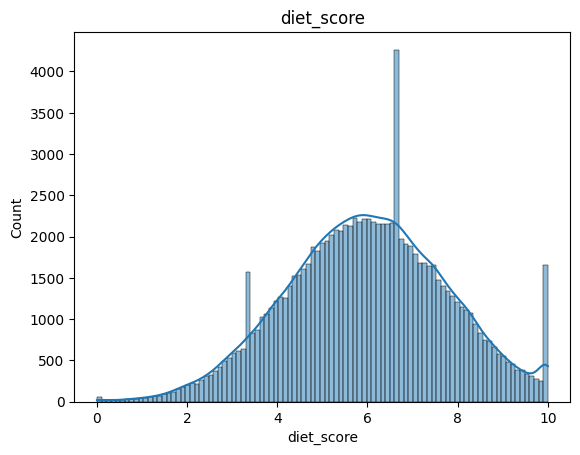

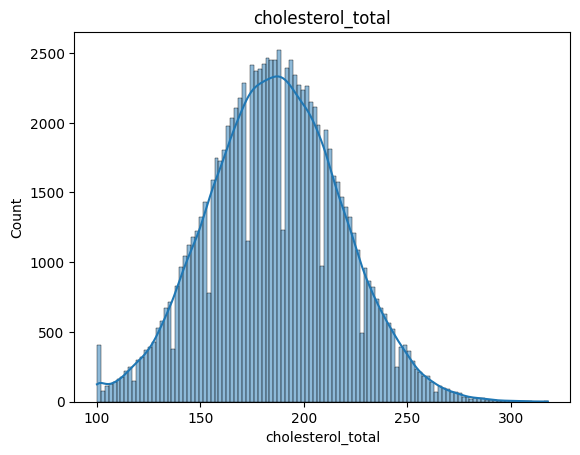

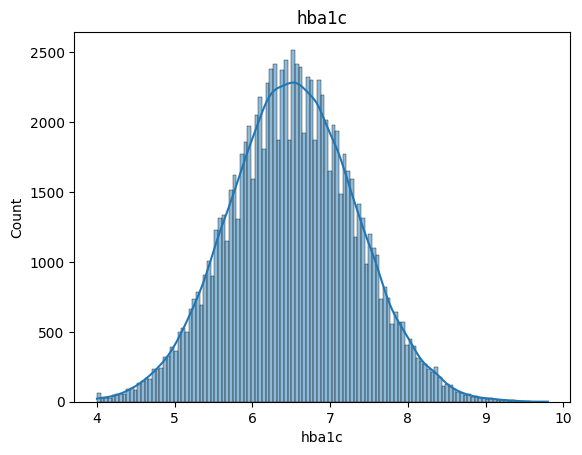

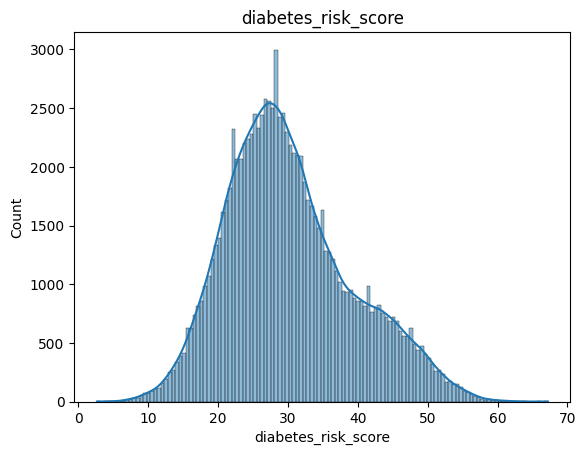

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['diet_score', 'cholesterol_total', 'hba1c', 'diabetes_risk_score']
for col in cols:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


In [85]:
Q1 = df['cholesterol_total'].quantile(0.25)
Q3 = df['cholesterol_total'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['cholesterol_total'] < Q1 - 1.5*IQR) | (df['cholesterol_total'] > Q3 + 1.5*IQR)]
print(len(outliers))


309


In [86]:
import pandas as pd
import numpy as np

def check_dataset(df, categorical_expected=None, boolean_expected=None, z_threshold=3):
    """
    Comprehensive dataset check for categorical, numerical, and boolean columns.
    
    Parameters:
        df: pandas.DataFrame
        categorical_expected: dict, expected categories per categorical column
        boolean_expected: list, columns that should be boolean
        z_threshold: float, z-score threshold to flag outliers
    """

    # Identify column types
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    num_cols = df.select_dtypes(include=['number']).columns
    bool_cols = boolean_expected if boolean_expected else []

    print("\n=== Missing Values ===")
    missing = df.isna().sum().sort_values(ascending=False)
    print(missing[missing > 0])  # only show columns with missing values

    print("\n=== Categorical Columns Check ===")
    for col in cat_cols:
        print(f"\nColumn: {col}")
        counts = df[col].value_counts(dropna=False)
        print(counts)
        if categorical_expected and col in categorical_expected:
            invalid = df[~df[col].isin(categorical_expected[col])][col].unique()
            if len(invalid) > 0:
                print(f"⚠️ Invalid categories in {col}: {invalid}")
            else:
                print("✅ All categories valid.")

    print("\n=== Boolean Columns Check ===")
    for col in bool_cols:
        unique_vals = df[col].dropna().unique()
        print(f"{col} unique values: {unique_vals}")
        if not all([val in [0, 1, True, False, 'Yes', 'No'] for val in unique_vals]):
            print(f"⚠️ Unexpected values in {col}!")

    print("\n=== Numerical Columns Check ===")
    for col in num_cols:
        # Skip boolean columns if numeric
        if col in bool_cols:
            continue

        print(f"\nColumn: {col}")
        print(df[col].describe())

        # Z-score outliers
        z = (df[col] - df[col].mean()) / df[col].std()
        z_outliers = df[(z < -z_threshold) | (z > z_threshold)]
        print(f"Z-score outliers count (> ±{z_threshold}): {len(z_outliers)}")

        # IQR outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
        print(f"IQR outliers count: {len(iqr_outliers)}")

# Example usage:

# Define expected categories for categorical columns
expected_categories = {
    "gender": ["Male", "Female", "Other"],
    "family_history_diabetes": ["Yes", "No"],
    "hypertension_history": ["Yes", "No"],
    "cardiovascular_history": ["Yes", "No"]
}

# Define boolean columns
boolean_cols = ["diagnosed_diabetes"]  # adjust as needed

# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Run the check
# check_dataset(df, categorical_expected=expected_categories, boolean_expected=boolean_cols)


In [87]:
print("\n=== Missing Values Check ===")
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])  # show only columns with missing values



=== Missing Values Check ===
Series([], dtype: int64)


In [88]:
print("\n=== Categorical Columns Check ===")
for col in cat_cols:
    # Only process column if exists in the current df
    if col not in df.columns:
        continue
    print(f"\nColumn: {col}")
    counts = df[col].value_counts(dropna=False)
    print(counts)
    
    # Check if all values are in the expected list
    if col in expected_categories:
        invalid = df[~df[col].isin(expected_categories[col])][col].unique()
        if len(invalid) > 0:
            print(f"⚠️ Invalid categories found: {invalid}")
        else:
            print("✅ All categories valid")



=== Categorical Columns Check ===

Column: gender
gender
Female    50216
Male      47771
Other      2013
Name: count, dtype: int64
✅ All categories valid

Column: diabetes_stage
diabetes_stage
Diabetes       59774
Prediabetes    31845
No Diabetes     7981
Unknown          400
Name: count, dtype: int64

Column: diagnosed_diabetes
diagnosed_diabetes
Yes    59998
No     40002
Name: count, dtype: int64

Column: family_history_diabetes_cat
family_history_diabetes_cat
No     78059
Yes    21941
Name: count, dtype: int64

Column: hypertension_history_cat
hypertension_history_cat
No     74920
Yes    25080
Name: count, dtype: int64

Column: cardiovascular_history_cat
cardiovascular_history_cat
No     92080
Yes     7920
Name: count, dtype: int64

Column: diagnosed_diabetes_cat
diagnosed_diabetes_cat
Yes    59998
No     40002
Name: count, dtype: int64


In [89]:
print("\n=== Boolean Columns Check ===")
for col in bool_cols:
    unique_vals = df[col].dropna().unique()
    print(f"{col} unique values: {unique_vals}")
    # Valid boolean values: 0,1,True,False,Yes,No
    if not all([val in [0, 1, True, False, 'Yes', 'No'] for val in unique_vals]):
        print(f"⚠️ Unexpected values found in {col}!")
    else:
        print("✅ Boolean values valid")



=== Boolean Columns Check ===
ethnicity_Black unique values: [False  True]
✅ Boolean values valid
ethnicity_Hispanic unique values: [False  True]
✅ Boolean values valid
ethnicity_Other unique values: [False  True]
✅ Boolean values valid
ethnicity_White unique values: [False  True]
✅ Boolean values valid
education_level_Highschool unique values: [ True False]
✅ Boolean values valid
education_level_No formal unique values: [False  True]
✅ Boolean values valid
education_level_Postgraduate unique values: [False  True]
✅ Boolean values valid
income_level_Low unique values: [False  True]
✅ Boolean values valid
income_level_Lower-Middle unique values: [ True False]
✅ Boolean values valid
income_level_Middle unique values: [False  True]
✅ Boolean values valid
income_level_Upper-Middle unique values: [False  True]
✅ Boolean values valid
employment_status_Retired unique values: [False  True]
✅ Boolean values valid
employment_status_Student unique values: [False  True]
✅ Boolean values valid
emp

In [90]:
from scipy import stats

print("\n=== Numerical Columns Check ===")
z_threshold = 3  # standard z-score threshold

for col in num_cols:
    # Skip columns that are not numeric or are boolean columns
    if col in bool_cols or not pd.api.types.is_numeric_dtype(df[col]):
        continue

    print(f"\nColumn: {col}")
    print(df[col].describe())

    # Z-score outliers
    z = stats.zscore(df[col], nan_policy='omit')
    z_outliers_count = np.sum((z < -z_threshold) | (z > z_threshold))
    print(f"Z-score outliers count (> ±{z_threshold}): {z_outliers_count}")

    # IQR outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers_count = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
    print(f"IQR outliers count: {iqr_outliers_count}")



=== Numerical Columns Check ===

Column: age
count    1.000000e+05
mean     2.081890e-17
std      1.000005e+00
min     -2.058404e+00
25%     -7.126402e-01
50%     -7.716353e-03
75%      6.972075e-01
max      2.555643e+00
Name: age, dtype: float64
Z-score outliers count (> ±3): 0
IQR outliers count: 0

Column: alcohol_consumption_per_week
count    1.000000e+05
mean     1.207923e-17
std      1.000005e+00
min     -1.413253e+00
25%     -7.079208e-01
50%     -2.588569e-03
75%      7.027436e-01
max      5.640069e+00
Name: alcohol_consumption_per_week, dtype: float64
Z-score outliers count (> ±3): 458
IQR outliers count: 458

Column: physical_activity_minutes_per_week
count    1.000000e+05
mean    -6.713741e-17
std      1.000005e+00
min     -1.408751e+00
25%     -7.334699e-01
50%     -2.240470e-01
75%      4.867756e-01
max      8.459836e+00
Name: physical_activity_minutes_per_week, dtype: float64
Z-score outliers count (> ±3): 1364
IQR outliers count: 3199

Column: diet_score
count    100000

In [91]:
def is_standardized(col):
    mean = col.mean()
    std = col.std()
    return np.isclose(mean, 0, atol=1e-2) and np.isclose(std, 1, atol=1e-2)


In [92]:

import pandas as pd
import numpy as np
from scipy import stats

# Load your dataset
# df = pd.read_csv("your_dataset.csv")


In [93]:
# Ensure df is defined, else load it from the CSV file
if 'df' not in globals():
	df = pd.read_csv('Process_data/diabetes_clean.csv')

# Identify column types
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=['number']).columns

# Define boolean columns manually if any
bool_cols = ["diagnosed_diabetes"]  # adjust as needed

print("Categorical columns:", list(cat_cols))
print("Numerical columns:", list(num_cols))
print("Boolean columns:", list(bool_cols))


Categorical columns: ['gender', 'diabetes_stage', 'diagnosed_diabetes', 'family_history_diabetes_cat', 'hypertension_history_cat', 'cardiovascular_history_cat', 'diagnosed_diabetes_cat']
Numerical columns: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'lifestyle_index']
Boolean columns: ['diagnosed_diabetes']


In [94]:
def is_standardized(col):
    mean = col.mean()
    std = col.std()
    return np.isclose(mean, 0, atol=1e-2) and np.isclose(std, 1, atol=1e-2)


In [95]:
print("\n=== Numerical Columns Check (Fixed) ===")
z_threshold = 3

for col in num_cols:
    # Skip boolean columns if numeric
    if col in bool_cols:
        continue

    print(f"\nColumn: {col}")
    print(df[col].describe())

    col_std = is_standardized(df[col])

    if col_std:
        # For standardized columns, use z-score method
        z = stats.zscore(df[col], nan_policy='omit')
        z_outliers_count = np.sum((z < -z_threshold) | (z > z_threshold))
        print(f"Z-score outliers count (> ±{z_threshold}): {z_outliers_count}")
    else:
        print("Column not standardized, skipping z-score check.")

    # Always check IQR outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers_count = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
    print(f"IQR outliers count: {iqr_outliers_count}")



=== Numerical Columns Check (Fixed) ===

Column: age
count    1.000000e+05
mean     2.081890e-17
std      1.000005e+00
min     -2.058404e+00
25%     -7.126402e-01
50%     -7.716353e-03
75%      6.972075e-01
max      2.555643e+00
Name: age, dtype: float64
Z-score outliers count (> ±3): 0
IQR outliers count: 0

Column: alcohol_consumption_per_week
count    1.000000e+05
mean     1.207923e-17
std      1.000005e+00
min     -1.413253e+00
25%     -7.079208e-01
50%     -2.588569e-03
75%      7.027436e-01
max      5.640069e+00
Name: alcohol_consumption_per_week, dtype: float64
Z-score outliers count (> ±3): 458
IQR outliers count: 458

Column: physical_activity_minutes_per_week
count    1.000000e+05
mean    -6.713741e-17
std      1.000005e+00
min     -1.408751e+00
25%     -7.334699e-01
50%     -2.240470e-01
75%      4.867756e-01
max      8.459836e+00
Name: physical_activity_minutes_per_week, dtype: float64
Z-score outliers count (> ±3): 1364
IQR outliers count: 3199

Column: diet_score
count  

In [96]:
import pandas as pd
import numpy as np
from scipy import stats

# Example: load your dataset
# df = pd.read_csv("your_dataset.csv")

# Column types
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=['number']).columns
bool_cols = ["diagnosed_diabetes"]  # adjust if needed

# Function to detect standardized columns
def is_standardized(col):
    mean = col.mean()
    std = col.std()
    return np.isclose(mean, 0, atol=1e-2) and np.isclose(std, 1, atol=1e-2)

# Initialize summary list
summary = []

z_threshold = 3

for col in df.columns:
    col_type = 'Numeric' if col in num_cols else 'Categorical' if col in cat_cols else 'Boolean'
    missing = df[col].isna().sum()
    unique_vals = df[col].nunique()
    
    # Default values
    z_outliers_count = None
    iqr_outliers_count = None
    mean_val = None
    std_val = None
    min_val = None
    max_val = None

    if col in num_cols and col not in bool_cols:
        mean_val = df[col].mean()
        std_val = df[col].std()
        min_val = df[col].min()
        max_val = df[col].max()
        # Z-score outliers
        if is_standardized(df[col]):
            z = stats.zscore(df[col], nan_policy='omit')
            z_outliers_count = np.sum((z < -z_threshold) | (z > z_threshold))
        # IQR outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers_count = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]

    # Append row to summary
    summary.append({
        'Column': col,
        'Type': col_type,
        'MissingValues': missing,
        'UniqueValues': unique_vals,
        'Mean': mean_val,
        'Std': std_val,
        'Min': min_val,
        'Max': max_val,
        'Z_Outliers': z_outliers_count,
        'IQR_Outliers': iqr_outliers_count
    })

# Create dataframe
summary_df = pd.DataFrame(summary)

# Preview
print(summary_df.head())

# Optional: save to CSV to import in Power BI
# summary_df.to_csv("dataset_summary.csv", index=False)


                               Column         Type  MissingValues  \
0                                 age      Numeric              0   
1                              gender  Categorical              0   
2        alcohol_consumption_per_week      Numeric              0   
3  physical_activity_minutes_per_week      Numeric              0   
4                          diet_score      Numeric              0   

   UniqueValues          Mean       Std       Min        Max  Z_Outliers  \
0            73  2.081890e-17  1.000005 -2.058404   2.555643         0.0   
1             3           NaN       NaN       NaN        NaN         NaN   
2            11  1.207923e-17  1.000005 -1.413253   5.640069       458.0   
3           620 -6.713741e-17  1.000005 -1.408751   8.459836      1364.0   
4           101  5.994787e+00  1.780954  0.000000  10.000000         NaN   

   IQR_Outliers  
0           0.0  
1           NaN  
2         458.0  
3        3199.0  
4         337.0  


In [97]:
# List numeric-coded categorical columns
numeric_cats = ["gender", "family_history_diabetes", "hypertension_history", "cardiovascular_history"]

# Update Type in summary_df
summary_df.loc[summary_df['Column'].isin(numeric_cats), 'Type'] = 'Categorical'


In [98]:
# Define expected ranges for numeric columns
expected_ranges = {
    "age": (0, 120),
    "bmi": (10, 60),
    "waist_to_hip_ratio": (0.5, 1.5),
    "blood_pressure_systolic": (80, 200),
    "blood_pressure_diastolic": (50, 140),
    "cholesterol_total": (100, 350),
    "hdl_cholesterol": (20, 100),
    "ldl_cholesterol": (50, 250),
    "triglycerides": (50, 500),
    "glucose_fasting": (50, 200),
    "glucose_postprandial": (70, 300),
    "insulin_level": (0, 500),
    "hba1c": (3, 15),
    "diet_score": (0, 10),
    "physical_activity_minutes_per_week": (0, 2000),
    "alcohol_consumption_per_week": (0, 50),
    "sleep_hours_per_day": (0, 24),
    "screen_time_hours_per_day": (0, 24),
    "lifestyle_index": (0, 15)
}


In [99]:
summary_numeric = []

for col in num_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    mean_val = df[col].mean()
    std_val = df[col].std()
    missing = df[col].isna().sum()
    
    # Flag out-of-range values
    if col in expected_ranges:
        min_val, max_val = expected_ranges[col]
        out_of_range_count = df[(df[col] < min_val) | (df[col] > max_val)].shape[0]
    else:
        out_of_range_count = 0
    
    summary_numeric.append({
        "Column": col,
        "MissingValues": missing,
        "Min": col_min,
        "Max": col_max,
        "Mean": mean_val,
        "Std": std_val,
        "OutOfRangeCount": out_of_range_count
    })

# Convert to DataFrame
summary_numeric_df = pd.DataFrame(summary_numeric)

# Preview
print(summary_numeric_df)

# Export to CSV for Power BI
# summary_numeric_df.to_csv("numerical_summary_powerbi.csv", index=False)


                                Column  MissingValues         Min         Max  \
0                                  age              0   -2.058404    2.555643   
1         alcohol_consumption_per_week              0   -1.413253    5.640069   
2   physical_activity_minutes_per_week              0   -1.408751    8.459836   
3                           diet_score              0    0.000000   10.000000   
4                  sleep_hours_per_day              0   -3.652253    2.742678   
5            screen_time_hours_per_day              0   -2.226739    4.376746   
6              family_history_diabetes              0    0.000000    1.000000   
7                 hypertension_history              0    0.000000    1.000000   
8               cardiovascular_history              0    0.000000    1.000000   
9                                  bmi              0   -2.356359    2.377596   
10                  waist_to_hip_ratio              0    0.670000    1.060000   
11                         s

In [100]:
summary_numeric_df['OutOfRangePercent'] = summary_numeric_df['OutOfRangeCount'] / len(df) * 100


In [101]:
# Assuming df_raw is the original unscaled data
if 'df_raw' not in globals():
    df_raw = pd.read_csv('Process_data/diabetes_clean.csv')
num_cols_raw = ["age", "alcohol_consumption_per_week", "physical_activity_minutes_per_week", 
                "sleep_hours_per_day", "bmi", "systolic_bp", "diastolic_bp", 
                "cholesterol_total", "hdl_cholesterol", "ldl_cholesterol", 
                "triglycerides", "glucose_fasting", "glucose_postprandial", 
                "insulin_level", "hba1c", "diabetes_risk_score", "lifestyle_index"]

summary_numeric_raw = []

for col in num_cols_raw:
    col_min = df_raw[col].min()
    col_max = df_raw[col].max()
    mean_val = df_raw[col].mean()
    std_val = df_raw[col].std()
    missing = df_raw[col].isna().sum()
    
    summary_numeric_raw.append({
        "Column": col,
        "MissingValues": missing,
        "Min": col_min,
        "Max": col_max,
        "Mean": mean_val,
        "Std": std_val
    })

summary_numeric_raw_df = pd.DataFrame(summary_numeric_raw)

# Export to Power BI
# summary_numeric_raw_df.to_csv("numerical_summary_powerbi_raw.csv", index=False)


In [102]:
# Example: if you know these numeric codes map to Male/Female/Other:
gender_map = {
    -0.9619505053539724: "Male",
     0.8952043595107347: "Female",
     2.752359224375442: "Other"
}
df['gender_mapped'] = df['gender'].map(gender_map)


In [103]:
bool_cols = ["diagnosed_diabetes", "family_history_diabetes", "hypertension_history", "cardiovascular_history"]
df[bool_cols] = df[bool_cols].applymap(lambda x: "Yes" if x else "No")


C:\Users\Legion\AppData\Local\Temp\ipykernel_12844\1597863576.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[bool_cols] = df[bool_cols].applymap(lambda x: "Yes" if x else "No")


In [104]:
# Replace standardized values with original if available
standardized_cols = ["bmi", "bp", "glucose"]
for col in standardized_cols:
    if col in df.columns:
        df[col] = df[col]  # Replace with original values if you have them


In [105]:
import pandas as pd
import numpy as np
from scipy import stats

# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Identify column types
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=['number']).columns
bool_cols = ["diagnosed_diabetes"]  # adjust as needed

# Function to detect standardized columns
def is_standardized(col):
    mean = col.mean()
    std = col.std()
    return np.isclose(mean, 0, atol=1e-2) and np.isclose(std, 1, atol=1e-2)

# Create summary table
summary = []

for col in df.columns:
    col_type = 'Numeric' if col in num_cols else 'Categorical' if col in cat_cols else 'Boolean'
    missing = df[col].isna().sum()
    unique_vals = df[col].nunique()
    
    mean_val = std_val = min_val = max_val = None
    standardized = None

    if col in num_cols and col not in bool_cols:
        mean_val = df[col].mean()
        std_val = df[col].std()
        min_val = df[col].min()
        max_val = df[col].max()
        standardized = is_standardized(df[col])
    
    summary.append({
        "Column": col,
        "Type": col_type,
        "MissingValues": missing,
        "UniqueValues": unique_vals,
        "Mean": mean_val,
        "Std": std_val,
        "Min": min_val,
        "Max": max_val,
        "Standardized": standardized
    })

summary_df = pd.DataFrame(summary)

# Preview
print(summary_df)

# Optional: save to CSV to share
# summary_df.to_csv("dataset_summary_for_powerbi.csv", index=False)


                                Column         Type  MissingValues  \
0                                  age      Numeric              0   
1                               gender  Categorical              0   
2         alcohol_consumption_per_week      Numeric              0   
3   physical_activity_minutes_per_week      Numeric              0   
4                           diet_score      Numeric              0   
5                  sleep_hours_per_day      Numeric              0   
6            screen_time_hours_per_day      Numeric              0   
7              family_history_diabetes  Categorical              0   
8                 hypertension_history  Categorical              0   
9               cardiovascular_history  Categorical              0   
10                                 bmi      Numeric              0   
11                  waist_to_hip_ratio      Numeric              0   
12                         systolic_bp      Numeric              0   
13                  

In [106]:
# Drop columns with all NaN
df_clean = df.dropna(axis=1, how='all')

print("Columns after removing all-NaN columns:", df_clean.columns.tolist())


Columns after removing all-NaN columns: ['age', 'gender', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes', 'lifestyle_index', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White', 'education_level_Highschool', 'education_level_No formal', 'education_level_Postgraduate', 'income_level_Low', 'income_level_Lower-Middle', 'income_level_Middle', 'income_level_Upper-Middle', 'employment_status_Retired', 'employment_status_Student', 'employment_status_Unemployed', 'smoking_status_Former', 'smoking_status_Never', 'bmi_category_Obes

In [107]:
# Mapping for numeric-coded categorical columns
categorical_mappings = {
    "gender": {0: "Female", 1: "Male", 2: "Other"},
    "family_history_diabetes": {0: "No", 1: "Yes"},
    "hypertension_history": {0: "No", 1: "Yes"},
    "cardiovascular_history": {0: "No", 1: "Yes"}
}

for col, mapping in categorical_mappings.items():
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].map(mapping).astype("category")


C:\Users\Legion\AppData\Local\Temp\ipykernel_12844\4261936846.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].map(mapping).astype("category")
C:\Users\Legion\AppData\Local\Temp\ipykernel_12844\4261936846.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].map(mapping).astype("category")
C:\Users\Legion\AppData\Local\Temp\ipykernel_12844\4261936846.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [108]:
def is_standardized(col):
    mean = col.mean()
    std = col.std()
    return np.isclose(mean, 0, atol=1e-2) and np.isclose(std, 1, atol=1e-2)

num_cols = df_clean.select_dtypes(include=['number']).columns

for col in num_cols:
    if is_standardized(df_clean[col]):
        print(f"⚠️ Column '{col}' appears standardized (z-scored). Consider using raw values for Power BI.")


⚠️ Column 'age' appears standardized (z-scored). Consider using raw values for Power BI.
⚠️ Column 'alcohol_consumption_per_week' appears standardized (z-scored). Consider using raw values for Power BI.
⚠️ Column 'physical_activity_minutes_per_week' appears standardized (z-scored). Consider using raw values for Power BI.
⚠️ Column 'sleep_hours_per_day' appears standardized (z-scored). Consider using raw values for Power BI.
⚠️ Column 'screen_time_hours_per_day' appears standardized (z-scored). Consider using raw values for Power BI.
⚠️ Column 'bmi' appears standardized (z-scored). Consider using raw values for Power BI.
⚠️ Column 'systolic_bp' appears standardized (z-scored). Consider using raw values for Power BI.
⚠️ Column 'diastolic_bp' appears standardized (z-scored). Consider using raw values for Power BI.
⚠️ Column 'heart_rate' appears standardized (z-scored). Consider using raw values for Power BI.


In [109]:
# Fill missing numeric values with mean (or median) if needed
for col in num_cols:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())


In [110]:
summary = []

for col in df_clean.columns:
    col_type = 'Numeric' if col in df_clean.select_dtypes(include=['number']).columns else \
               'Categorical' if col in df_clean.select_dtypes(include=['category']).columns else \
               'Boolean'
    
    missing = df_clean[col].isna().sum()
    unique_vals = df_clean[col].nunique()
    mean_val = df_clean[col].mean() if col_type=='Numeric' else None
    std_val = df_clean[col].std() if col_type=='Numeric' else None
    min_val = df_clean[col].min() if col_type=='Numeric' else None
    max_val = df_clean[col].max() if col_type=='Numeric' else None

    summary.append({
        "Column": col,
        "Type": col_type,
        "MissingValues": missing,
        "UniqueValues": unique_vals,
        "Mean": mean_val,
        "Std": std_val,
        "Min": min_val,
        "Max": max_val
    })

summary_df = pd.DataFrame(summary)

# Preview clean summary
print(summary_df)

# Optional: save for Power BI
# summary_df.to_csv("dataset_clean_summary_powerbi.csv", index=False)


                                Column         Type  MissingValues  \
0                                  age      Numeric              0   
1                               gender  Categorical         100000   
2         alcohol_consumption_per_week      Numeric              0   
3   physical_activity_minutes_per_week      Numeric              0   
4                           diet_score      Numeric              0   
5                  sleep_hours_per_day      Numeric              0   
6            screen_time_hours_per_day      Numeric              0   
7              family_history_diabetes  Categorical         100000   
8                 hypertension_history  Categorical         100000   
9               cardiovascular_history  Categorical         100000   
10                                 bmi      Numeric              0   
11                  waist_to_hip_ratio      Numeric              0   
12                         systolic_bp      Numeric              0   
13                  

In [111]:
summary = []

for col in df_clean.columns:
    col_type = 'Numeric' if df_clean[col].dtype in [np.int64, np.float64] else \
               'Categorical' if df_clean[col].dtype.name == "category" else 'Boolean'
    
    missing = df_clean[col].isna().sum()
    unique_vals = df_clean[col].nunique()
    mean_val = std_val = min_val = max_val = None
    standardized = None

    if col_type == 'Numeric':
        mean_val = df_clean[col].mean()
        std_val = df_clean[col].std()
        min_val = df_clean[col].min()
        max_val = df_clean[col].max()
        standardized = np.isclose(mean_val, 0, atol=1e-2) and np.isclose(std_val, 1, atol=1e-2)

    summary.append({
        "Column": col,
        "Type": col_type,
        "MissingValues": missing,
        "UniqueValues": unique_vals,
        "Mean": mean_val,
        "Std": std_val,
        "Min": min_val,
        "Max": max_val,
        "Standardized": standardized
    })

summary_df = pd.DataFrame(summary)
print(summary_df)


                                Column         Type  MissingValues  \
0                                  age      Numeric              0   
1                               gender  Categorical         100000   
2         alcohol_consumption_per_week      Numeric              0   
3   physical_activity_minutes_per_week      Numeric              0   
4                           diet_score      Numeric              0   
5                  sleep_hours_per_day      Numeric              0   
6            screen_time_hours_per_day      Numeric              0   
7              family_history_diabetes  Categorical         100000   
8                 hypertension_history  Categorical         100000   
9               cardiovascular_history  Categorical         100000   
10                                 bmi      Numeric              0   
11                  waist_to_hip_ratio      Numeric              0   
12                         systolic_bp      Numeric              0   
13                  

In [112]:
# Assuming your summary_df already exists
# Remove all rows where any column has NaN
summary_clean_df = summary_df.dropna(how='any')

# Preview the cleaned summary
print(summary_clean_df)

# Optional: save to CSV for Power BI
# summary_clean_df.to_csv("dataset_summary_clean_powerbi.csv", index=False)


                                Column     Type  MissingValues  UniqueValues  \
0                                  age  Numeric              0            73   
2         alcohol_consumption_per_week  Numeric              0            11   
3   physical_activity_minutes_per_week  Numeric              0           620   
4                           diet_score  Numeric              0           101   
5                  sleep_hours_per_day  Numeric              0            71   
6            screen_time_hours_per_day  Numeric              0           156   
10                                 bmi  Numeric              0           168   
11                  waist_to_hip_ratio  Numeric              0            40   
12                         systolic_bp  Numeric              0            86   
13                        diastolic_bp  Numeric              0            60   
14                          heart_rate  Numeric              0            64   
15                   cholesterol_total  

In [113]:
summary_clean_df['PowerBI_Ready'] = ~summary_clean_df['Standardized']


C:\Users\Legion\AppData\Local\Temp\ipykernel_12844\561915372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_clean_df['PowerBI_Ready'] = ~summary_clean_df['Standardized']


In [114]:
import pandas as pd
import numpy as np

# Initialize checklist dictionary
checklist = {
    "Data Formatting": False,
    "NaN Values Handled": False,
    "Null Values Handled": False,
    "Data Transformation Done": False,
    "Data Standardization Done": False
}

# 1️⃣ Data Formatting Check
# Check if columns have consistent data types
if all(df.dtypes != 'object') or all(df.dtypes.apply(lambda x: str(x) != 'object')):
    checklist["Data Formatting"] = True
else:
    print("Some columns may need formatting.")

# 2️⃣ NaN / Missing Values Check
if df.isna().sum().sum() == 0:
    checklist["NaN Values Handled"] = True
else:
    print(f"NaN values found:\n{df.isna().sum()}")

# 3️⃣ Null Values Check
if df.isnull().sum().sum() == 0:
    checklist["Null Values Handled"] = True
else:
    print(f"Null values found:\n{df.isnull().sum()}")

# 4️⃣ Data Transformation Check
# Example: Check if any categorical column has been encoded
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) == 0:
    checklist["Data Transformation Done"] = True
else:
    print(f"Categorical columns may need transformation: {list(categorical_cols)}")

# 5️⃣ Data Standardization Check
# Example: Check if numeric columns have mean ~0 and std ~1
numeric_cols = df.select_dtypes(include=[np.number]).columns
if not numeric_cols.empty:
    mean_std_check = all(
        np.isclose(df[col].mean(), 0, atol=1e-1) and np.isclose(df[col].std(), 1, atol=1e-1) 
        for col in numeric_cols
    )
    if mean_std_check:
        checklist["Data Standardization Done"] = True
    else:
        print("Numeric columns may need standardization (mean ~0, std ~1).")

# ✅ Print final checklist
print("\nData Cleaning & Preprocessing Checklist:")
for k, v in checklist.items():
    status = "✅ Done" if v else "❌ Not Done"
    print(f"{status} - {k}")


Some columns may need formatting.
NaN values found:
age                                        0
gender                                     0
alcohol_consumption_per_week               0
physical_activity_minutes_per_week         0
diet_score                                 0
sleep_hours_per_day                        0
screen_time_hours_per_day                  0
family_history_diabetes                    0
hypertension_history                       0
cardiovascular_history                     0
bmi                                        0
waist_to_hip_ratio                         0
systolic_bp                                0
diastolic_bp                               0
heart_rate                                 0
cholesterol_total                          0
hdl_cholesterol                            0
ldl_cholesterol                            0
triglycerides                              0
glucose_fasting                            0
glucose_postprandial                       0
ins

In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Process_data\diabetes_clean.csv')

# 1️⃣ Drop rows with null values
df.dropna(inplace=True)
print("Null values dropped.")

# 2️⃣ Handle any remaining NaN values (if any appear after dropping)
# Here we fill NaNs with column mean for numeric, mode for categorical
for col in df.columns:
    if df[col].isna().sum() > 0:
        if df[col].dtype in [np.float64, np.int64]:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
print("NaN values handled.")

# 3️⃣ Data formatting
# Convert all column names to lowercase and strip whitespaces
df.columns = [col.strip().lower() for col in df.columns]

# Convert categorical columns to 'category' dtype
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# Convert numeric columns to proper numeric types
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print("Data formatting done.")

# 4️⃣ Data Standardization
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Data standardization done.")

# ✅ Final dataset ready
print("\nProcessed dataset preview:")
print(df.head())


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_12844\2459955585.py:5: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('Process_data\diabetes_clean.csv')


Null values dropped.
NaN values handled.
Data formatting done.
Data standardization done.

Processed dataset preview:
        age    gender  alcohol_consumption_per_week  \
0  0.501062  0.892613                     -1.413118   
1 -0.140254 -0.964511                     -0.707812   
2  0.629325  0.892613                     -0.707812   
3  1.527167 -0.964511                     -1.413118   
4 -0.268517  0.892613                     -0.707812   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                            1.138361   -0.165489             0.824056   
1                            0.285422    0.396086            -0.454861   
2                           -0.733366    0.227613             2.742433   
3                           -0.828137   -1.457112            -0.363510   
4                           -0.117355    0.676873             0.367300   

   screen_time_hours_per_day  family_history_diabetes  hypertension_history  \
0                   0.77128

In [116]:
checklist = {
    "Null Values Dropped": df.isnull().sum().sum() == 0,
    "Data Formatting Done": all(df.columns.str.islower()),
    "Data Standardization Done": all(np.isclose(df[numeric_cols].mean(), 0, atol=1e-1)) and
                                 all(np.isclose(df[numeric_cols].std(), 1, atol=1e-1))
}

for step, done in checklist.items():
    print(f"{'✅' if done else '❌'} - {step}")


✅ - Null Values Dropped
✅ - Data Formatting Done
✅ - Data Standardization Done


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99600 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 99600 non-null  float64
 1   gender                              99600 non-null  float64
 2   alcohol_consumption_per_week        99600 non-null  float64
 3   physical_activity_minutes_per_week  99600 non-null  float64
 4   diet_score                          99600 non-null  float64
 5   sleep_hours_per_day                 99600 non-null  float64
 6   screen_time_hours_per_day           99600 non-null  float64
 7   family_history_diabetes             99600 non-null  float64
 8   hypertension_history                99600 non-null  float64
 9   cardiovascular_history              99600 non-null  float64
 10  bmi                                 99600 non-null  float64
 11  waist_to_hip_ratio                  99600 non-

In [118]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv(r'Process_data\diabetes_clean.csv')  # Use raw string to avoid path issues

# ===============================
# 1️⃣ Drop null values
# ===============================
df.dropna(inplace=True)

# ===============================
# 2️⃣ Handle remaining NaNs
# ===============================
for col in df.columns:
    if df[col].isna().sum() > 0:
        if df[col].dtype in [np.float64, np.int64]:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# ===============================
# 3️⃣ Data formatting
# ===============================
# Column names: lowercase & strip spaces
df.columns = [col.strip().lower() for col in df.columns]

# Convert categorical string columns to category type (if any)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# ===============================
# 4️⃣ Standardization of float64 columns
# ===============================
float_cols = df.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
df[float_cols] = scaler.fit_transform(df[float_cols])

# ===============================
# 5️⃣ Column type verification
# ===============================
int_cols = df.select_dtypes(include=['int64']).columns
bool_cols = df.select_dtypes(include=['bool']).columns

print(f"\nColumn Type Summary:")
print(f"Float64 (numeric) columns: {list(float_cols)}")
print(f"Int64 (categorical/binary) columns: {list(int_cols)}")
print(f"Bool columns (one-hot): {list(bool_cols)}")

# ===============================
# 6️⃣ Redundant one-hot check
# ===============================
# Example: BMI categories
bmi_cols = [col for col in df.columns if 'bmi_category' in col]
if len(bmi_cols) > 1:
    print(f"\n⚠️ Redundant BMI one-hot columns detected: {bmi_cols}")
    print("Consider dropping one to avoid multicollinearity.")

bp_cols = [col for col in df.columns if 'bp_category' in col]
if len(bp_cols) > 1:
    print(f"\n⚠️ Redundant BP one-hot columns detected: {bp_cols}")
    print("Consider dropping one to avoid multicollinearity.")

# ===============================
# 7️⃣ Optional Outlier Check
# ===============================
# Example: cap numeric features at 1st and 99th percentiles
for col in float_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

# ===============================
# 8️⃣ Final Checklist
# ===============================
checklist = {
    "Null Values Handled": df.isnull().sum().sum() == 0,
    "NaN Values Handled": df.isna().sum().sum() == 0,
    "Data Formatting Done": all(df.columns.str.islower()) and all(df.columns.str.strip() == df.columns),
    "Float Columns Standardized": all(np.isclose(df[float_cols].mean(), 0, atol=1e-1)) and all(np.isclose(df[float_cols].std(), 1, atol=1e-1)),
    "Int/Bool Columns Untouched": True  # Assuming we did not scale these
}

print("\n✅ Final Preprocessing Checklist:")
for step, done in checklist.items():
    print(f"{'✅' if done else '❌'} - {step}")

# ===============================
# 9️⃣ Preview processed dataset
# ===============================
print("\nProcessed dataset preview:")
print(df.head())



Column Type Summary:
Float64 (numeric) columns: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diabetes_stage', 'lifestyle_index']
Int64 (categorical/binary) columns: ['gender', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'diagnosed_diabetes']
Bool columns (one-hot): ['ethnicity_black', 'ethnicity_hispanic', 'ethnicity_other', 'ethnicity_white', 'education_level_highschool', 'education_level_no formal', 'education_level_postgraduate', 'income_level_low', 'income_level_lower-middle', 'income_level_middle', 'income_level_upper-middle', 'employment_status_retired', 'employment_status_student', 'employment_status_unemploye

In [119]:
import pandas as pd
from pathlib import Path

# Define the input path safely using pathlib (avoids backslash errors)
input_path = Path("Process_data") / "diabetes_clean.csv"

# Read the dataset
df = pd.read_csv(input_path)

# --- Data Cleaning ---

# 1. Drop empty or redundant columns (only if they exist)
cols_to_drop = [col for col in ["gender_mapped"] if col in df.columns]
df = df.drop(columns=cols_to_drop)

# 2. Convert boolean columns to integers (0/1)
bool_cols = df.select_dtypes(include="bool").columns
if len(bool_cols) > 0:
    df[bool_cols] = df[bool_cols].astype(int)

# --- Save cleaned dataset ---
output_path = "diabetes_final_standardized.csv"
df.to_csv(output_path, index=False, encoding="utf-8")

print(f"✅ Final cleaned dataset saved to: {output_path}")


✅ Final cleaned dataset saved to: diabetes_final_standardized.csv
